# Essential workers testing for SF
--------------------------------------

This notebook lists different test cases and results for SF data.

Including: 
* **different types of essential workers:** edu, office, social, supermarket
        for example: 100% of edu workers comply vs. the same number of random individuals comply
                     100% of office workers comply vs. the same number of random individuals comply etc.
* **different beta values:** 0.1~0.4
* **different ratios of (# of essential population)/(# of total population)**
        for example: 10% of the total population are essential vs. 50% of the total population are essential workers

## Contents

1. Model parameter settings:
        1.1 Parameters that are the same for all simulations
        1.2 Parameters to change:
            1.2.1 Types of essential workers
            1.2.2 Ratio of essential population
            1.2.3 Essential mobility pattern
2. Instructions to run the codes
3. Results and figures
        3.1 Edu workers (type 0)
            3.1.1 essential population ratio: 10%
                  * Compare 10% random vs 100% essential
                  * Compare 0% random vs 5% random vs 10% random
                  * Compare 0% essential vs 50% essential vs 100% essential
                  * Compare 10% random vs 100% essential **FOR DS 200**
                  * Compare 0% essential vs 50% essential vs 100% essential **FOR DS 200**
            3.1.2 essential population ratio: 0% vs 25% vs 50% **FOR DS 200**
            3.1.3 essential population ratio: 0% vs 50% **FOR DS 100**
            3.1.4 essential population ratio: 0% vs 2% ... vs 10% **FOR DS 200**
        3.2 Office workers (type 1)
            3.2.1 essential population ratio: 10%
                  * Compare 10% random vs 100% essential
                  * Compare 0% random vs 5% random vs 10% random
                  * Compare 0% essential vs 50% essential vs 100% essential
        3.3 Restuarant workers (type 2)
            3.3.1 essential population ratio: 10%
                  * Compare 10% random vs 100% essential
                  * Compare 0% random vs 5% random vs 10% random
                  * Compare 0% essential vs 50% essential vs 100% essential
        3.4 Supermarket workers (type 3)
            3.4.1 essential population ratio: 10%
                  * Compare 10% random vs 100% essential
                  * Compare 0% random vs 5% random vs 10% random
                  * Compare 0% essential vs 50% essential vs 100% essential
4. Appendix: How work places are assigned to essential workers
----------------------------------
----------------------------------

## 1. Model parameter settings

### 1.1 For all cases, the followings are the same:
-------------------------

* **downsampling rate:** 100

* **Population and sites details after downsampling:**

        The total population:8499 ;  The total number of sites:75

        Population in each age group:
        [387,   592,   308,    526,    3293,   1671,   1365,   362]
        [0-5,   5-14,  15-19,  20-24,  25-44,  45-59,  60-79,  80+]

        Number of sites in each type:
        [5,    37,      28,      5]
        [edu,  office,  social,  supermarket]


* **The mob_rate for regular individuals:**
        mob_rate_per_age_per_type = [
               [5,    0,    0,   0],    # 0-5
               [5,    0,    0,   0],    # 5-14
               [5,    0,    3.6, 0.22], # 15-19
               [1.48, 3.52, 3.6, 0.21], # 20-24
               [0,    5,    3.6, 0.27], # 25-44
               [0,    5,    3.6, 0.36], # 45-59
               [0,    0,    3.6, 0.35], # 60-79
               [0,    0,    3.6, 0.35]] # 80+

* **Duration time at each type of site:** dur_mean_per_type = [5.0, 5.0, 0.64, 0.4]


* **Variety per type:**   variety_per_type = [1, 1, 10, 2]


* **Essential proportion in each age group:**
        essential_distribution:
        [0,     0,     0.0125,   0.0682,   0.4616,   0.3889,    0.0688,   0]
        [0-5,   5-14,  15-19,    20-24,    25-44,    45-59,     60-79,    80+]
        for example, 4% of the essential population in age group 15-19 are essential workers
        data from https://www.bls.gov/cps/tables.htm#charemp
        
* **Simulation period:**
        start_date = 2020-03-04
        end_date = 2020-03-04

* **random repeats:** 40

* **testing parameters:**
        testing freq:     24 hrs
        reperting lag:    48 hrs
        testing capacity per batch: 1
        test false rate:  0
        test smart contacts: 25
        isolation after tested positive: 7*24 hrs
        testing policy: basic
        

---------------------------------------------------
### 1.2 Parameters to change

###   1.2.1 Types of essential workers

In the codes, **essential_type** denotes different types of essential workers.

Since there are 4 types of sites, there will be 4 types of essential workers:

            essential_type = 0  →  edu workers (e.g. teachers)
            essential_type = 1  →  office workers
            essential_type = 2  →  social places workers (e.g. restuarants)
            essential_type = 3  →  supermarket workers

### 1.2.2 Ratio of essential population

In the codes, **essential_to_total_ratio_list** denotes ratio of essential workers.

You can either input one number or a list of ratios.

For example, if the ratio is 0.1, it means 10% of the total population are essential workers. Then this 10% will be distributed into different age groups at a possibility, essential_distribution, specified in the previous section.

An example of the # essential workers distribution with 10% of 8499 (previous section) is:

        num_essential_per_age_group = 
        [0,    0,     34,     51,     467,    255,    42,     0]      total number: 849, actual ratio: 10.11%
        [0-5,  5-14,  15-19,  20-24,  25-44,  45-59,  60-79,  80+]


### 1.2.3 Essential mobility patterns

The mobility patterns for essential workers differ from regular individuals in the following 3 ways:
* mob_rate: freq of visits to different sites
* dur_time: how long they stay for each visit
* work_place: essential workers always visit one specific work place while rugelar individuals don't

First, an essential type should be specified. The mob rate and duration time for essential workers are based on this essential type. How we assign a work place for each essential worker will be addressed in the appendix.

Mobility rates for different essential_types:

      essential_type = 0  →  edu workers             →     [5, 0, 3.6, 0.27]
      essential_type = 1  →  office workers          →     [0, 5, 3.6, 0.27]
      essential_type = 2  →  social places workers   →     [0, 0, 5,   0.27]
      essential_type = 3  →  supermarket workers     →     [0, 0, 3.6, 5   ]
      e.g. for each social place worker, he/she visits a social place 5 times a week, supermarkets 0.27 times a week
            

Duration time for different essential_types:

      essential_type = 0  →  edu workers             →     [5, 0, 0.64, 0.4]
      essential_type = 1  →  office workers          →     [0, 5, 0.64, 0.4]
      essential_type = 2  →  social places workers   →     [0, 0, 5,    0.4]
      essential_type = 3  →  supermarket workers     →     [0, 0, 0.64, 5  ]
      e.g. for each social place worker, he/she spends 5 hrs at a social place each visit, 0.4 hrs at supermarkets
            
**The only parameter needs to be changed manually is essential_type**, mob_rate and dur_time for essential workers will be assigned automatically.

-----------------------
## 2. Instructions to run simulations

1. **generate town data:**  
        run this on local computer: town_generator_essential.ipynb
        parameters that one can change:
            * essential_to_total_ratio_list (line 50)
            * essential_type (line 55)
2. **upload the town data .pk file to the cluster:**
        an example of the naming: sf_type3_prop0.1_ds100.pk
        it stands for: SF data, essential type 3 (supermarket), 10% of total population are workers, downsampled by 100
3. **run the simulations on cluster:**
        run this: simulation_no_towngen.py
            should change the town data file name before running (line 61)
            e.g. mob_settings = 'sf_type0_prop0.1_ds100.pk'
        parameters that one can change:
            * beta value (line 89-98)
            * compliance rate (line 210)
4. **download the results .pk file to local computer:**
        an example of the naming: comp[1.0]_repeats20_sf_type0_prop0.1_ds100.pk
        it stands for essential compliance rate 100%, simulation repeated 40 times
        (note that random individual compliance rate is 100%*essential_to_total_ratio_list so that the number of people comply are approximately the same)
5. **go to the results section (next) and plot:**
        change the file name and also label names if neccessary.

---------------------------------------
## 3. Results

In [1]:
# run this before plotting

%load_ext autoreload
%autoreload 2

import sys
if '..' not in sys.path:
    sys.path.append('..')


import pandas as pd
import numpy as np
import networkx as nx
import copy
import scipy as sp
import math
import seaborn
import pickle
import warnings
import matplotlib
import re
import multiprocessing

from lib.mobilitysim import MobilitySimulator
from lib.dynamics import DiseaseModel
from lib.inference import * 
from bayes_opt import BayesianOptimization
from lib.parallel import *
from lib.distributions import CovidDistributions
from lib.plot import Plotter
from lib.data import collect_data_from_df
from lib.measures import (
    MeasureList, 
    BetaMultiplierMeasure, 
    BetaMultiplierMeasureByType,
    SocialDistancingForAllMeasure, 
    SocialDistancingForKGroups,
    SocialDistancingByAgeMeasure,
    SocialDistancingForPositiveMeasure, 
    ComplianceForAllMeasure,
    Interval,
    ComplianceForEssentialWorkers)

from lib.mobilitysim import MobilitySimulator
from lib.town_data import generate_population, generate_sites, compute_distances
from lib.town_maps import MapIllustrator


def save_summary(summary, filename):
    with open('summaries/' + filename, 'wb') as fp:
        pickle.dump(summary, fp)
    
def load_summary(filename):
    with open('summaries/' + filename, 'rb') as fp:
        summary = pickle.load(fp)
    return summary

--------------------------------------------------------------
### 3.1 Edu essential workers: teachers (type 0)

#### 3.1.1 essential population ratio: 10%
####          * 10% random vs 100% essential

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 1.0
        
        school ID               = [9,   57,  41,  71,  28]
        teachers at each school = [164, 167, 170, 184, 174]
Compare the total infections for **100% of the teachers** comply versus **10% of random individuals** comply.

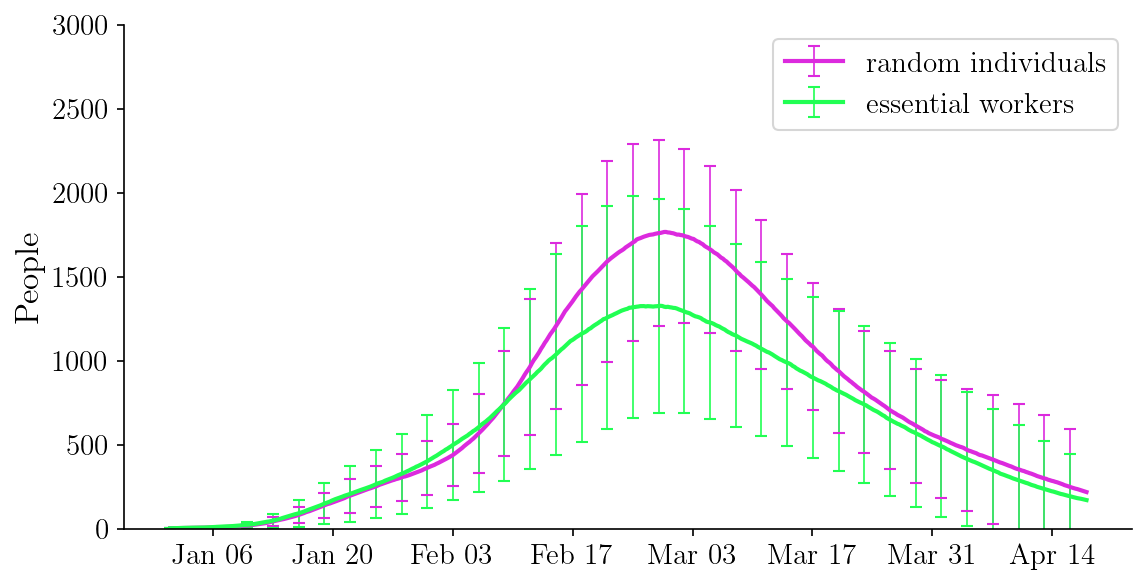

In [12]:
summaries_SD_6 = load_summary('comp[1.0]_repeats20_sf_type0_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

------------------------------
#### * **0% random vs 5% random vs 10% random**

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 0, 0.5, 1.0
        
        school ID               = [9,   57,  41,  71,  28]
        teachers at each school = [164, 167, 170, 184, 174]
Compare the total infections for **0% of random individuals** comply versus **5% of random individuals** comply versus **10% of random individuals**.

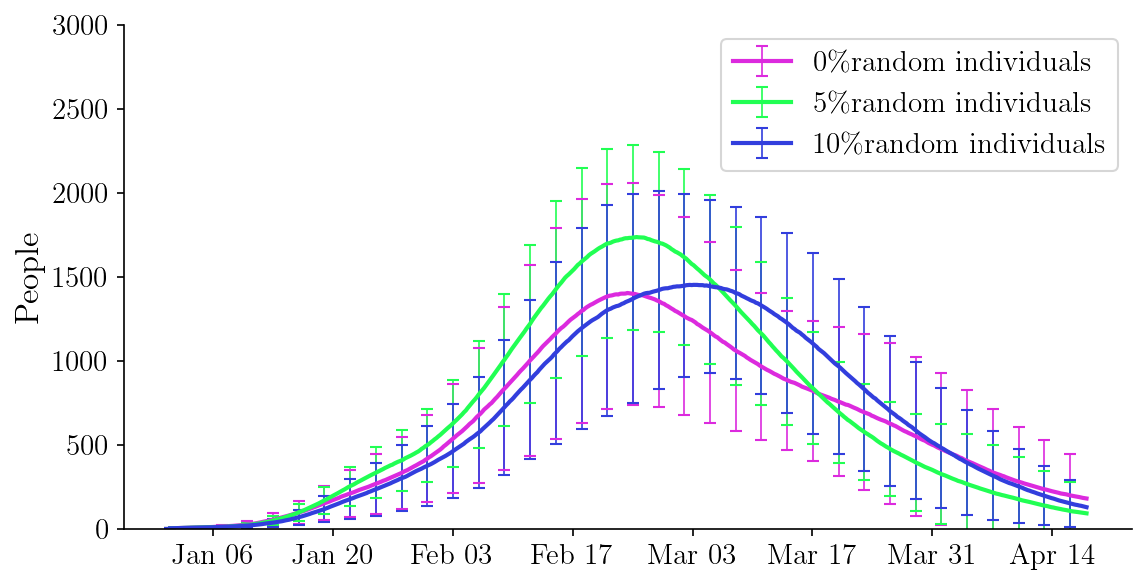

In [3]:
summaries_SD_6 = load_summary('comp[0.0,0.5,1.0]_repeats25_onlyall_sf_type0_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%random individuals','5\%random individuals','10\%random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

---------------------------
#### * 0% essential vs 50% essential vs 100% essential

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 0, 0.5, 1.0
        
        school ID               = [9,   57,  41,  71,  28]
        teachers at each school = [164, 167, 170, 184, 174]
Compare the total infections for **0% of essential workers** comply versus **50% of essential workers** comply versus **100% of essential workers**.

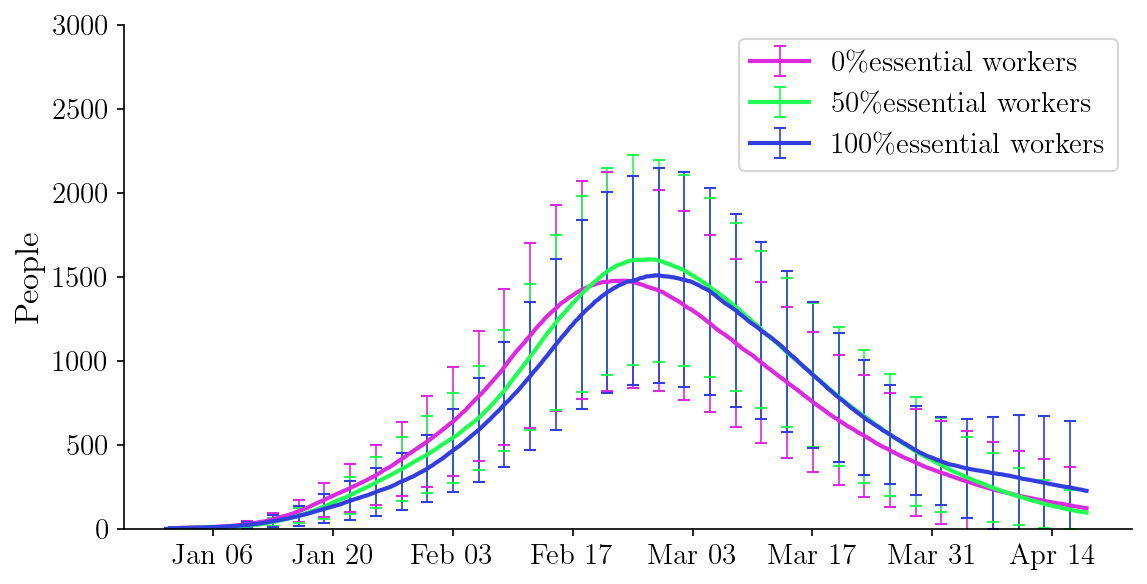

In [4]:
summaries_SD_6 = load_summary('comp[0.0,0.5,1.0]_repeats25_onlyessen_sf_type0_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential workers','50\%essential workers','100\%essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

--------------------------
-----------------------------
#### * 0% essential vs 50% essential vs 100% essential **FOR DS 200**

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 1.0
        
        total population: 4254 , sites: 37
        essential: 430 , non_essential: 3824 , propotion: 0.10108133521391631
        Sites by type:  [2, 20, 12, 3]
        work_site: [28, 9] 2
        number of workers at each work site: [215, 215] 430
        repeats: 50

Compare the total infections for **10% of random invididuals** comply versus **100% of essential workers**

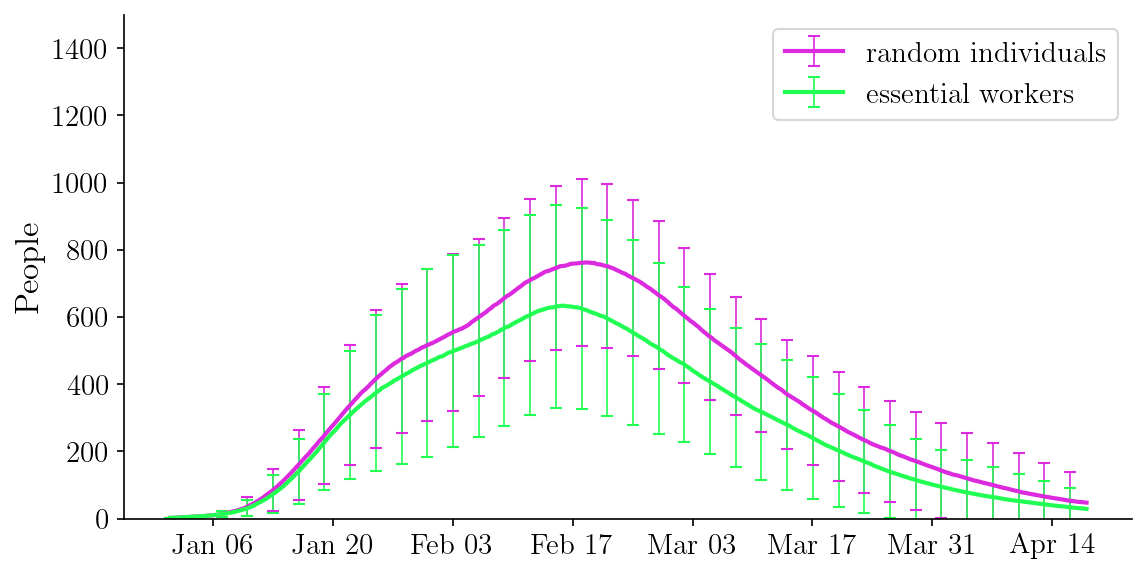

In [3]:
summaries_SD_6 = load_summary('comp[1.0]_repeats50_sf_type0_prop0.1_ds200.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=1500, errorevery=14)

--------------------------
#### * 0% essential vs 50% essential vs 100% essential **FOR DS 200**

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 0, 0.5, 1.0
        
        total population: 4254 , sites: 37
        essential: 430 , non_essential: 3824 , propotion: 0.10108133521391631
        Sites by type:  [2, 20, 12, 3]
        work_site: [28, 9] 2
        number of workers at each work site: [215, 215] 430

Compare the total infections for **0% of essential workers** comply versus **50% of essential workers** comply versus **100% of essential workers**.

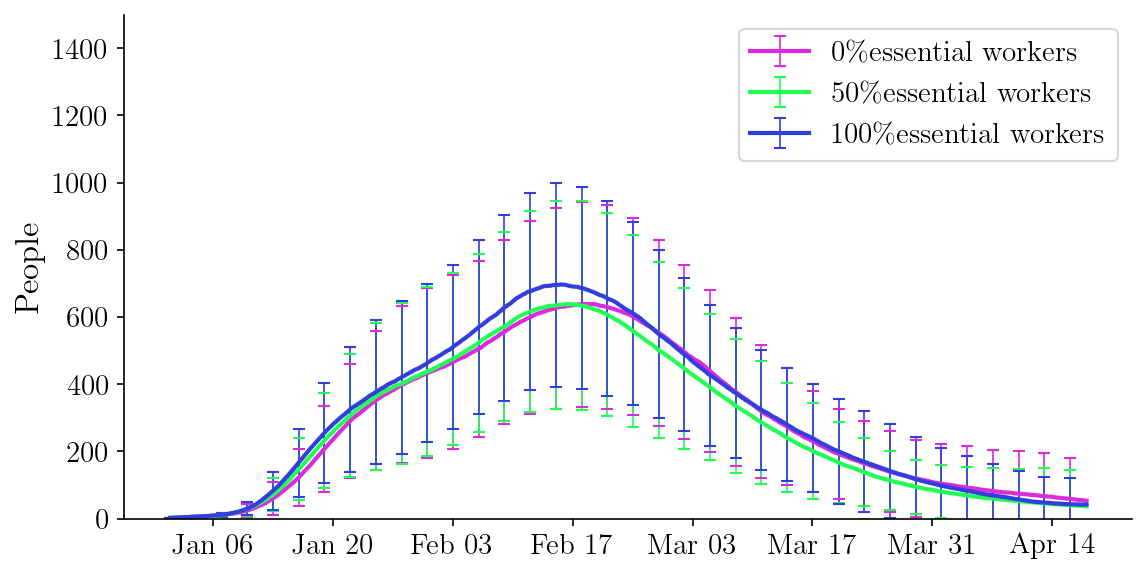

In [8]:
summaries_SD_6 = load_summary('comp[0.0,0.5,1.0]_repeats50_onlyessen_sf_type0_prop0.1_ds200.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential workers','50\%essential workers','100\%essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=1500, errorevery=14)

---------------------
----------------------
#### 3.1.2 essential population ratio: 0% vs 25% vs 50% **FOR DS 200**

0% random individuals comply vs 25% random vs 50% random

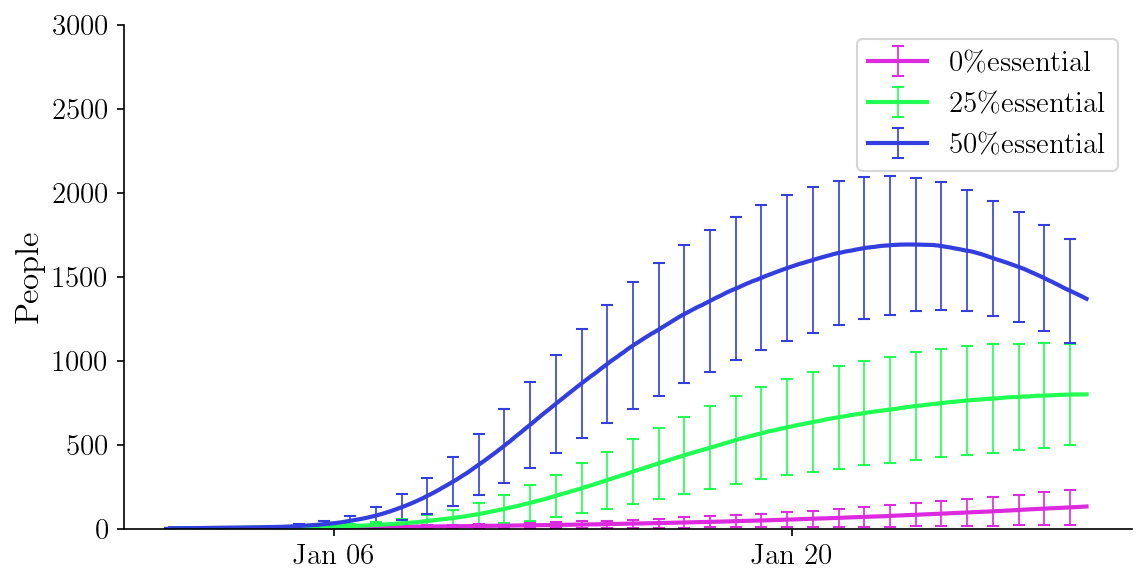

In [16]:
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.0,0.25,0.5]_sf_type0_prop0.5_ds200.pk')

plotter = Plotter()
title = ['0\%essential','25\%essential','50\%essential']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

---------------------
----------------------
#### 3.1.3 essential population ratio: 0%  vs 50% **FOR DS 100**

Parameters:
        
        essential_to_total_ratio_list = 0.0, 0.5
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 1.0
        
        total population: 4254 , sites: 37
        essential: 430 , non_essential: 3824 , propotion: 0.10108133521391631
        Sites by type:  [2, 20, 12, 3]
        work_site: [28, 9] 2
        number of workers at each work site: [215, 215] 430

Compare the total infections for **0% of essential population** versus **50% of essential population** 

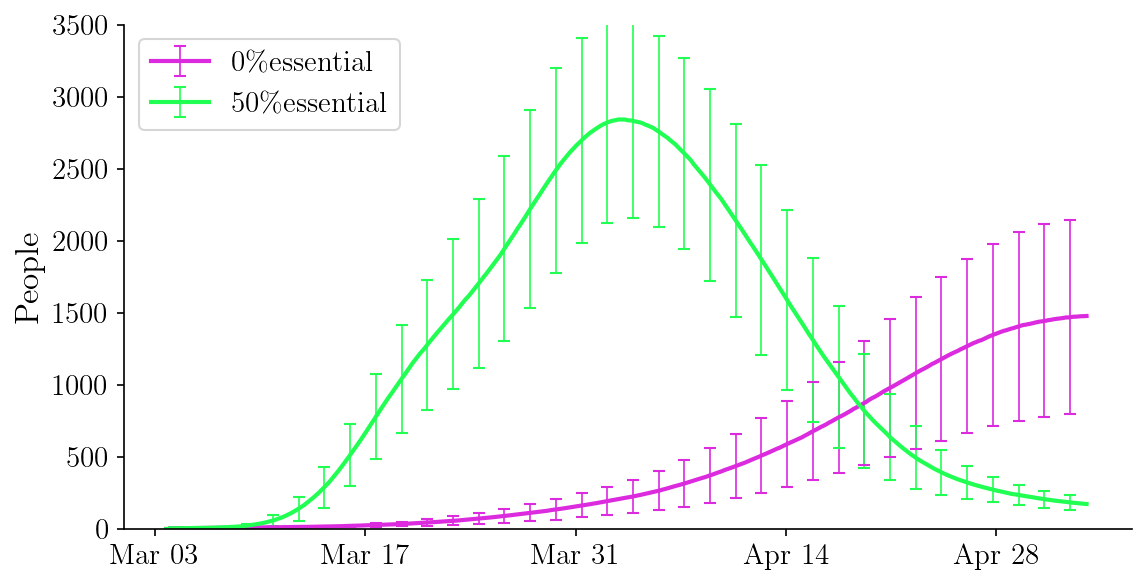

In [7]:
plt.close()
FIG1 = plt.figure(figsize=(8, 4))
AX1 = FIG1.add_subplot(111)
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.0,0.5]_sf_type0_prop0.5_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential','50\%essential']
essential_prop = ['0.0','0.5']
line_infected = dict()
count = 0
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=3500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1

---------------------
----------------------
#### 3.1.4 essential population ratio: 0% vs 2% ... vs 10% **FOR DS 200**

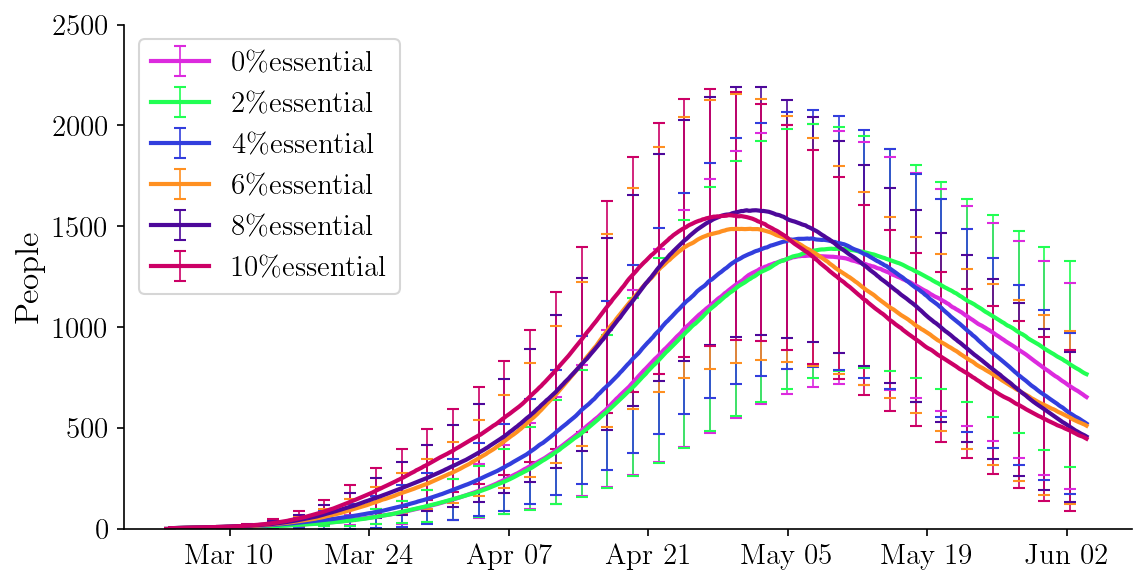

In [8]:
plt.close()
FIG1 = plt.figure(figsize=(8, 4))
AX1 = FIG1.add_subplot(111)
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.0,0.02,0.04,0.06,0.08,0.1]_sf_type0_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential','2\%essential','4\%essential','6\%essential','8\%essential','10\%essential']
line_infected = dict()
essential_prop = ['0.0','0.02','0.04','0.06','0.08','0.1']
count = 0
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=2500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1
 

In [9]:
print(count)
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.12,0.14,0.16,0.18,0.2]_sf_type0_prop0.2_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential','2\%essential','4\%essential','6\%essential','8\%essential','10\%essential','12\%essential','14\%essential','16\%essential','18\%essential','20\%essential']
essential_prop = ['0.12','0.14','0.16','0.18','0.2']
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=2500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1

6


<Figure size 900x600 with 0 Axes>

In [11]:
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.0,0.5]_sf_type0_prop0.5_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential','2\%essential','4\%essential','6\%essential','8\%essential','10\%essential','12\%essential','14\%essential','16\%essential','18\%essential','20\%essential','0\%essential','50\%essential']
essential_prop = ['0.0','0.5']
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=3500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1

<Figure size 900x600 with 0 Axes>

(737500.2244488978, 737545.4549098196)

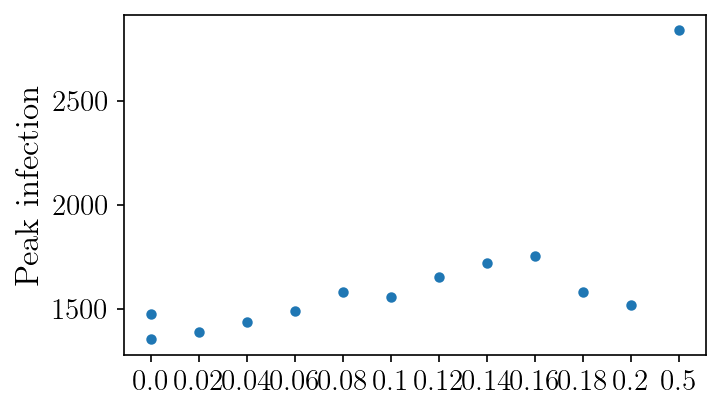

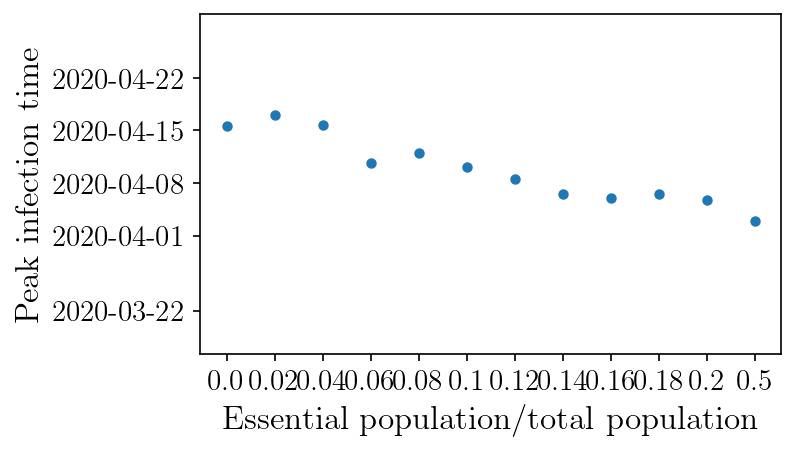

In [17]:
essential_prop = ['0.0','0.02','0.04','0.06','0.08','0.1','0.12','0.14','0.16','0.18','0.2','0.0','0.5']
max_infected = [0]*len(essential_prop)
max_infected_ind = [0]*len(essential_prop)
max_infected_time = [0]*len(essential_prop)
for i in range(len(essential_prop)):
    max_infected[i] = np.array(line_infected[i]).max()
    max_infected_ind[i] = np.where(line_infected[i]==max_infected[i])
    max_infected_time[i] = ts[max_infected_ind[i]]

FIG2 = plt.figure(figsize=(5, 3))
AX2 = FIG2.add_subplot(111)    
plt.plot(essential_prop,max_infected,'o')
AX2.set_ylabel('Peak infection')
# AX2.set_xlabel('Essential population/total population')
# AX2.set_ylim((600,2500))

FIG3 = plt.figure(figsize=(5, 3))
AX3 = FIG3.add_subplot(111)    
plt.plot(essential_prop,max_infected_time,'o')
AX3.set_ylabel('Peak infection time')
AX3.set_xlabel('Essential population/total population')
AX3.set_ylim((ts[100],ts[470]))

--------------------------------------------------------
### 3.2 office essential workers (type 1)

#### 3.2.1 essential population ratio: 10%
####          * 10% random vs 100% essential

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 1.0
        
        office ID : [12, 43, 35, 13, 67, 38, 20, 70, 0, 26, 62, 17, 60, 59, 48, 5, 45, 30, 58, 36, 21, 31, 25, 65, 4, 23,                        56, 46, 39, 22, 40, 14, 63, 16, 55, 18, 15] 
        office workers at each office: [19, 26, 27, 28, 31, 22, 20, 22, 16, 26, 25, 22, 28, 26, 27, 16, 18, 25, 20, 19, 35,                                         21, 28, 24, 23, 22, 31, 20, 22, 18, 19, 30, 20, 28, 18, 19, 18] 859

Compare the total infections for **100% of the office workers** comply versus **10% of random individuals** comply.

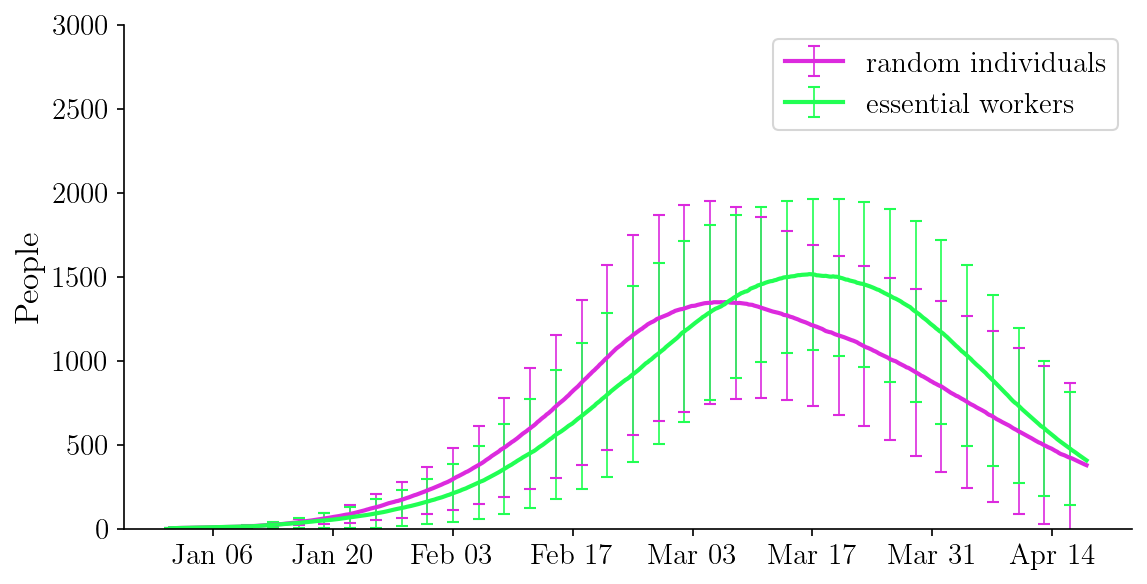

In [4]:
summaries_SD_6 = load_summary('comp[1.0]_repeats25_sf_type1_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

---------------------------
#### * 0% random vs 5% random vs 10% random

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 0, 0.5, 1.0
        
        office ID : [12, 43, 35, 13, 67, 38, 20, 70, 0, 26, 62, 17, 60, 59, 48, 5, 45, 30, 58, 36, 21, 31, 25, 65, 4, 23,                        56, 46, 39, 22, 40, 14, 63, 16, 55, 18, 15] 
        office workers at each office: [19, 26, 27, 28, 31, 22, 20, 22, 16, 26, 25, 22, 28, 26, 27, 16, 18, 25, 20, 19, 35,                                         21, 28, 24, 23, 22, 31, 20, 22, 18, 19, 30, 20, 28, 18, 19, 18] 859

Compare the total infections for **0% of random individuals** comply versus **5% of random individuals** versus **10% of random individuals**.

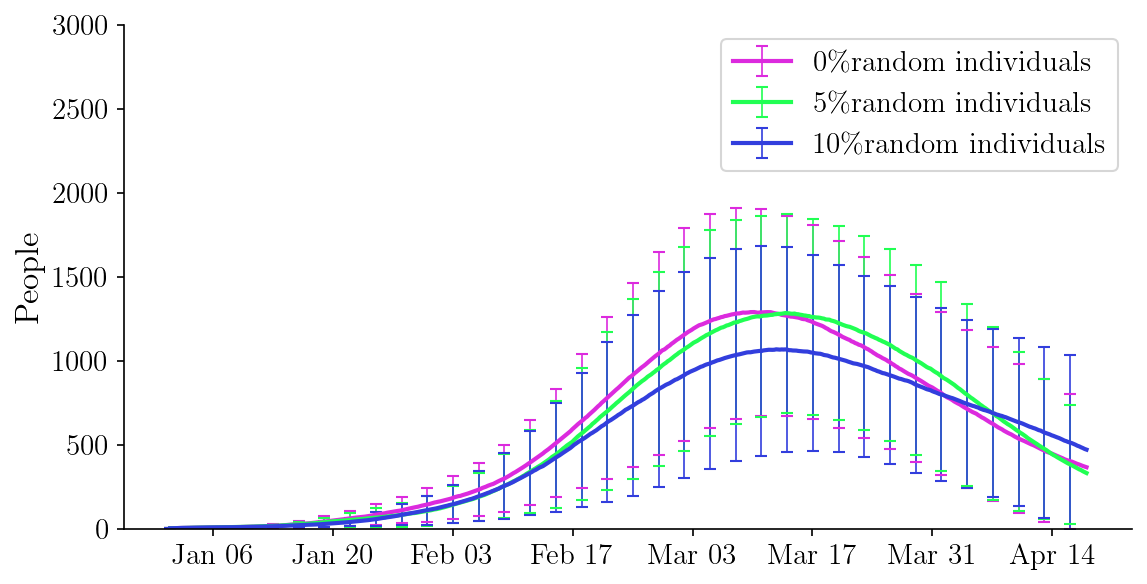

In [5]:
summaries_SD_6 = load_summary('comp[0.0,0.5,1.0]_repeats25_onlyall_sf_type1_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%random individuals','5\%random individuals','10\%random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

---------------------------
#### * 0% essential vs 50% essential vs 100% essential

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 0, 0.5, 1.0
        
        office ID : [12, 43, 35, 13, 67, 38, 20, 70, 0, 26, 62, 17, 60, 59, 48, 5, 45, 30, 58, 36, 21, 31, 25, 65, 4, 23,                        56, 46, 39, 22, 40, 14, 63, 16, 55, 18, 15] 
        office workers at each office: [19, 26, 27, 28, 31, 22, 20, 22, 16, 26, 25, 22, 28, 26, 27, 16, 18, 25, 20, 19, 35,                                         21, 28, 24, 23, 22, 31, 20, 22, 18, 19, 30, 20, 28, 18, 19, 18] 859

Compare the total infections for **0% of essential** comply versus **50% of essential** versus **100% of essential**.

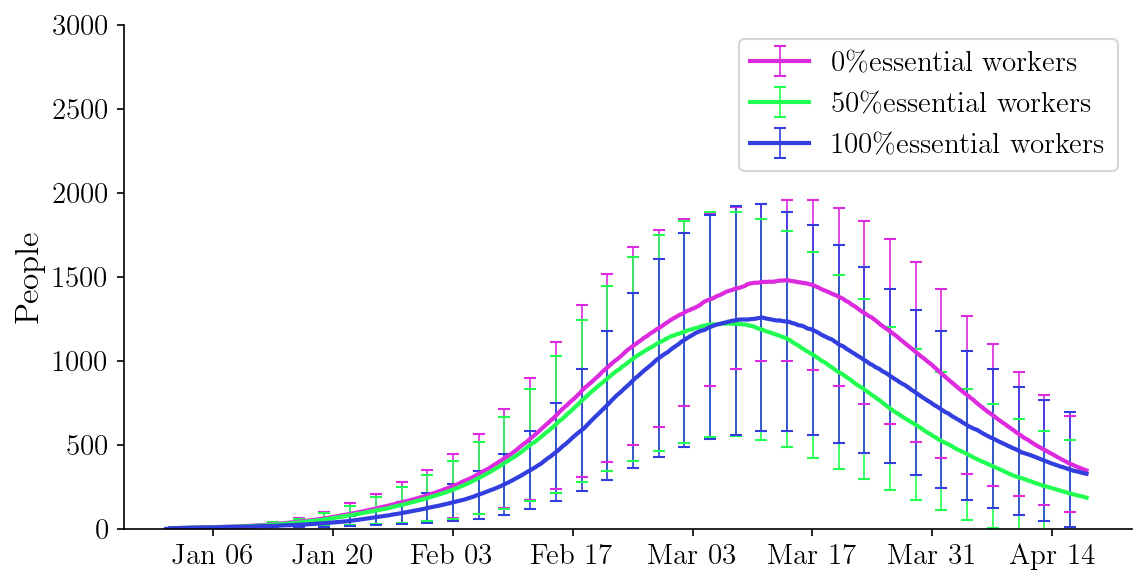

In [2]:
summaries_SD_6 = load_summary('comp[0.0,0.5,1.0]_repeats25_onlyessen_sf_type1_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential workers','50\%essential workers','100\%essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

---------------------------
-------------------------
### compare essential proportion

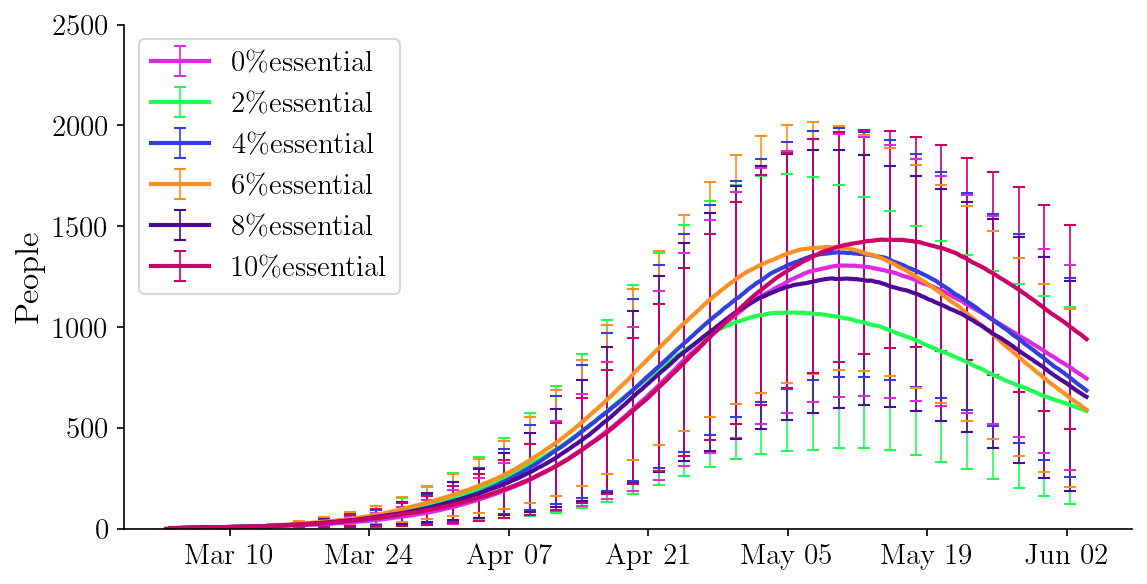

In [6]:
plt.close()
FIG1 = plt.figure(figsize=(8, 4))
AX1 = FIG1.add_subplot(111)
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.0,0.02,0.04,0.06,0.08,0.1]_sf_type1_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential','2\%essential','4\%essential','6\%essential','8\%essential','10\%essential']
line_infected = dict()
essential_prop = ['0.0','0.02','0.04','0.06','0.08','0.1']
count = 0
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=2500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1
 

In [7]:
print(count)
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.12,0.14,0.16,0.18,0.2]_sf_type1_prop0.2_ds100.pk')
title = ['0\%essential','2\%essential','4\%essential','6\%essential','8\%essential','10\%essential','12\%essential','14\%essential','16\%essential','18\%essential','20\%essential']
essential_prop = ['0.12','0.14','0.16','0.18','0.2']
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=2500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1

6


<Figure size 900x600 with 0 Axes>

(737524.873747495, 737574.6533066132)

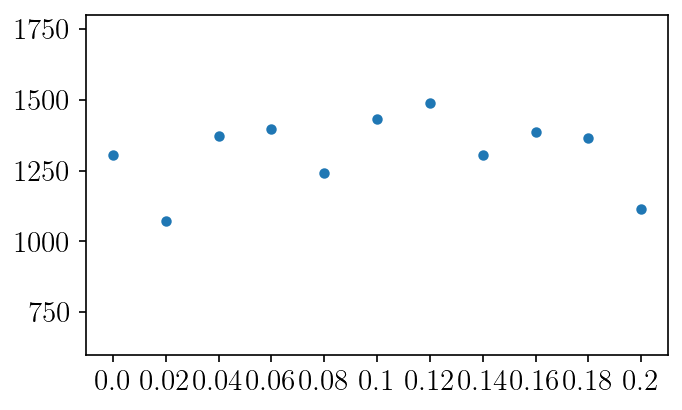

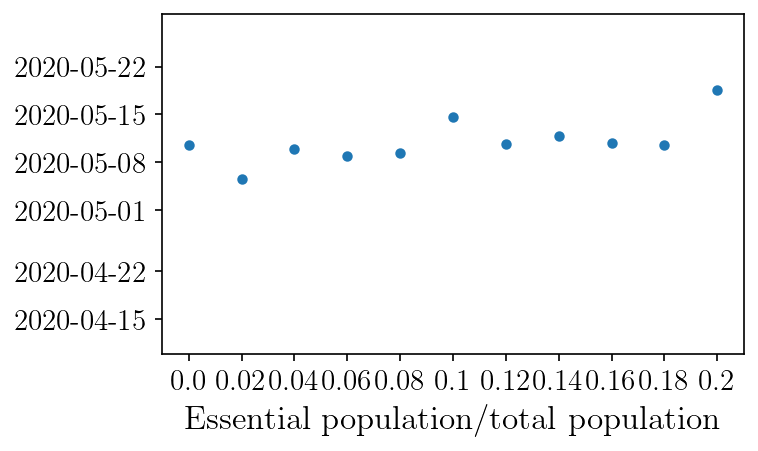

In [8]:
essential_prop = ['0.0','0.02','0.04','0.06','0.08','0.1','0.12','0.14','0.16','0.18','0.2']
max_infected = [0]*len(essential_prop)
max_infected_ind = [0]*len(essential_prop)
max_infected_time = [0]*len(essential_prop)
for i in range(len(essential_prop)):
    max_infected[i] = np.array(line_infected[i]).max()
    max_infected_ind[i] = np.where(line_infected[i]==max_infected[i])
    max_infected_time[i] = ts[max_infected_ind[i]]

FIG2 = plt.figure(figsize=(5, 3))
AX2 = FIG2.add_subplot(111)    
plt.plot(essential_prop,max_infected,'o')
# AX2.set_ylabel('Peak infection')
# AX2.set_xlabel('Essential population/total population')
AX2.set_ylim((600,1800))

FIG3 = plt.figure(figsize=(5, 3))
AX3 = FIG3.add_subplot(111)    
plt.plot(essential_prop,max_infected_time,'o')
# AX3.set_ylabel('Peak infection time')
AX3.set_xlabel('Essential population/total population')
AX3.set_ylim((ts[200],ts[470]))

----------------------------------------------------
### 3.3 Social places workers (type 2)

#### 3.3.1 essential population ratio: 10%
####          * 10% random vs 100% essential

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 1.0
        
        restuarants ID: [7, 51, 42, 74, 47, 24, 2, 34, 69, 19, 66, 54, 3, 52, 53, 37, 44, 64, 27, 73, 32, 61, 50, 29, 8, 6,                          72, 11] 28
        restuarant worker at each restuarant: [38, 33, 34, 38, 27, 22, 24, 40, 32, 31, 39, 30, 29, 24, 28, 30, 27, 26, 45,                                                29, 33, 37, 30, 20, 32, 18, 29, 34] 859

Compare the total infections for **100% of the restuarant workers** comply versus **10% of random individuals** comply.

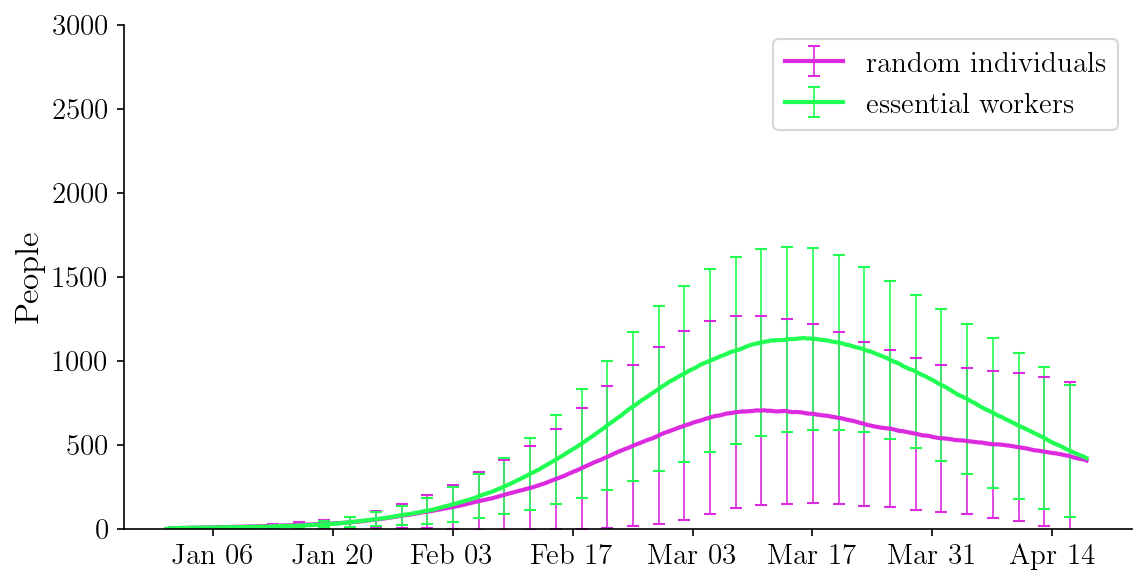

In [5]:
summaries_SD_6 = load_summary('comp[1.0]_repeats25_sf_type2_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

---------------------------
#### * 0% random vs 5% random vs 10% random

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 0, 0.5, 1.0
        
        restuarants ID: [7, 51, 42, 74, 47, 24, 2, 34, 69, 19, 66, 54, 3, 52, 53, 37, 44, 64, 27, 73, 32, 61, 50, 29, 8, 6,                          72, 11] 28
        restuarant worker at each restuarant: [38, 33, 34, 38, 27, 22, 24, 40, 32, 31, 39, 30, 29, 24, 28, 30, 27, 26, 45,                                                29, 33, 37, 30, 20, 32, 18, 29, 34] 859

Compare the total infections for **0% of random individuals** comply versus **5% of random individuals** versus **10% of random individuals**.

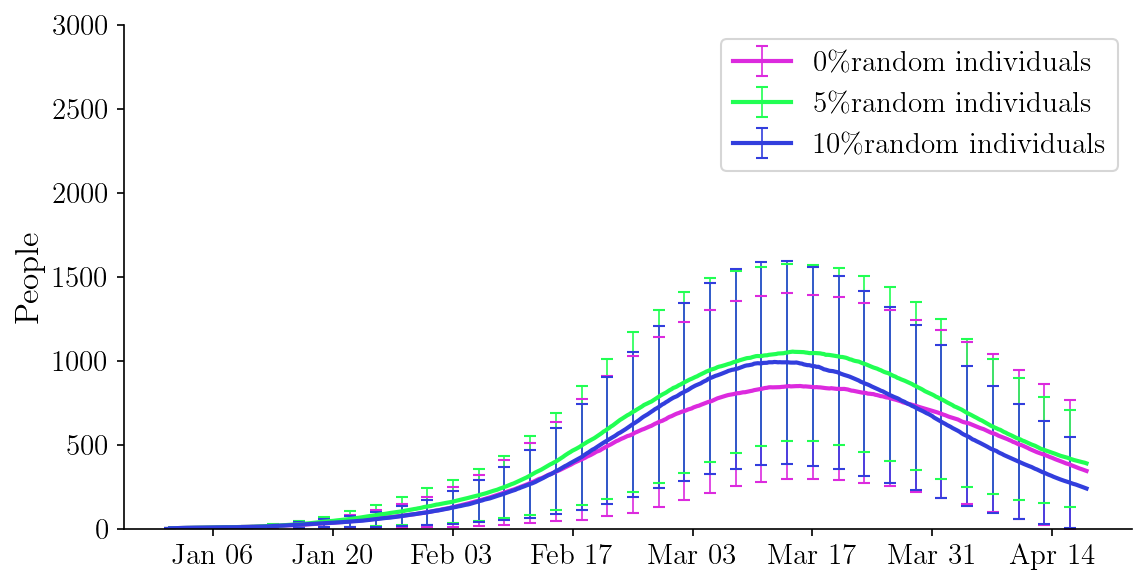

In [6]:
summaries_SD_6 = load_summary('comp[0.0,0.5,1.0]_repeats25_onlyall_sf_type2_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%random individuals','5\%random individuals','10\%random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

---------------------------
#### * 0% essential vs 50% essential vs 100% essential

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 0, 0.5, 1.0
        
        restuarants ID: [7, 51, 42, 74, 47, 24, 2, 34, 69, 19, 66, 54, 3, 52, 53, 37, 44, 64, 27, 73, 32, 61, 50, 29, 8, 6,                          72, 11] 28
        restuarant worker at each restuarant: [38, 33, 34, 38, 27, 22, 24, 40, 32, 31, 39, 30, 29, 24, 28, 30, 27, 26, 45,                                                29, 33, 37, 30, 20, 32, 18, 29, 34] 859

Compare the total infections for **0% of essential** comply versus **5% of essential** versus **10% of essential**.

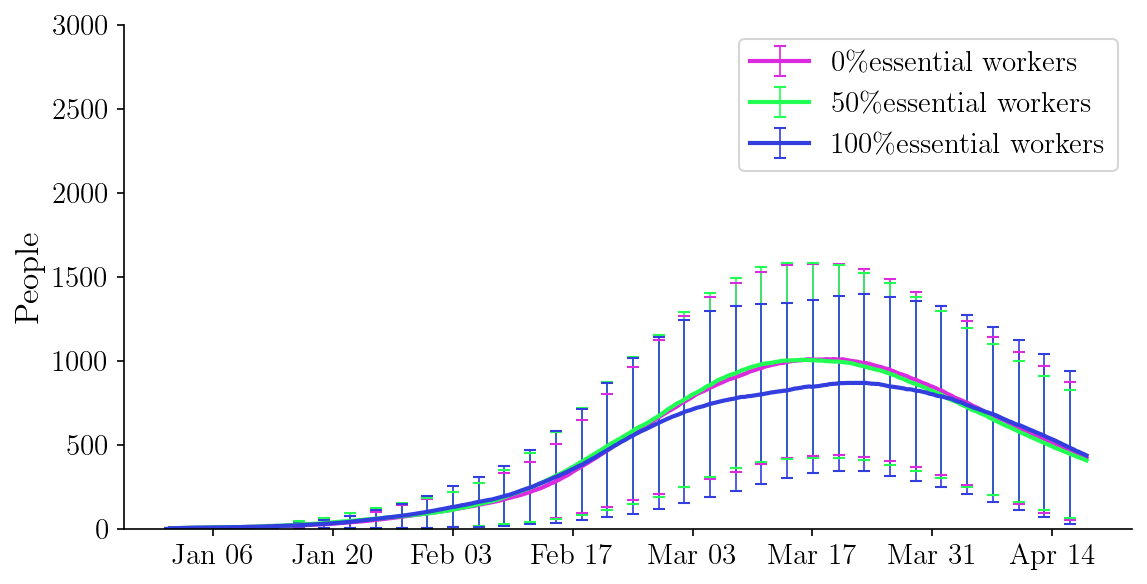

In [4]:
summaries_SD_6 = load_summary('comp[0.0,0.5,1.0]_repeats25_onlyessen_sf_type2_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential workers','50\%essential workers','100\%essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

--------------------------------
---------------------------
### compare essential proportion

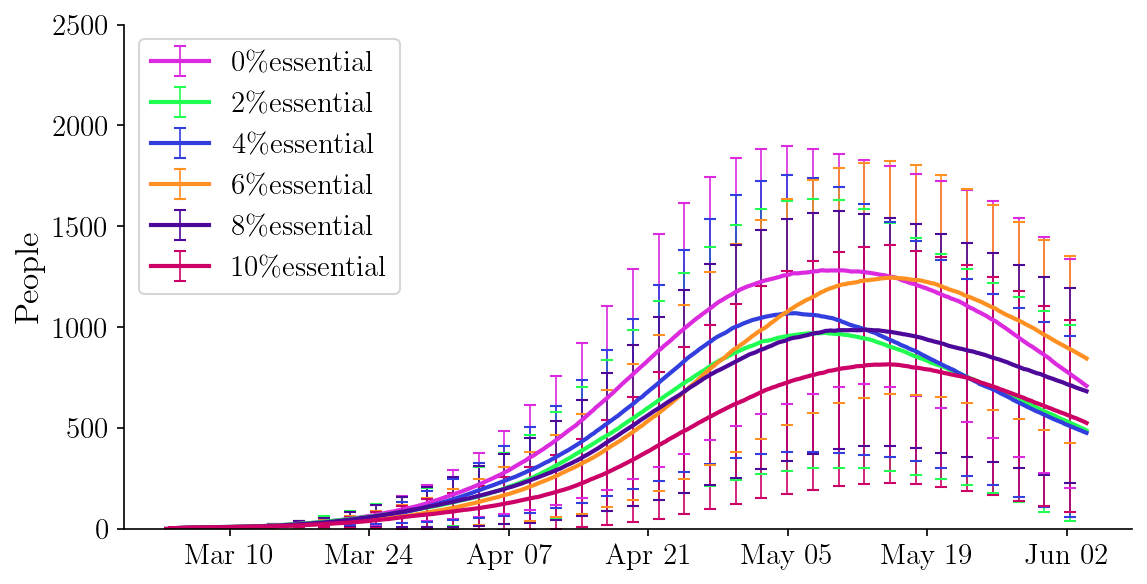

In [9]:
plt.close()
FIG1 = plt.figure(figsize=(8, 4))
AX1 = FIG1.add_subplot(111)
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.0,0.02,0.04,0.06,0.08,0.1]_sf_type2_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential','2\%essential','4\%essential','6\%essential','8\%essential','10\%essential']
line_infected = dict()
essential_prop = ['0.0','0.02','0.04','0.06','0.08','0.1']
count = 0
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=2500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1


In [10]:
print(count)
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.12,0.14,0.16,0.18,0.2]_sf_type2_prop0.2_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential','2\%essential','4\%essential','6\%essential','8\%essential','10\%essential','12\%essential','14\%essential','16\%essential','18\%essential','20\%essential']
essential_prop = ['0.12','0.14','0.16','0.18','0.2']
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=2500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1

6


<Figure size 900x600 with 0 Axes>

(737524.873747495, 737574.6533066132)

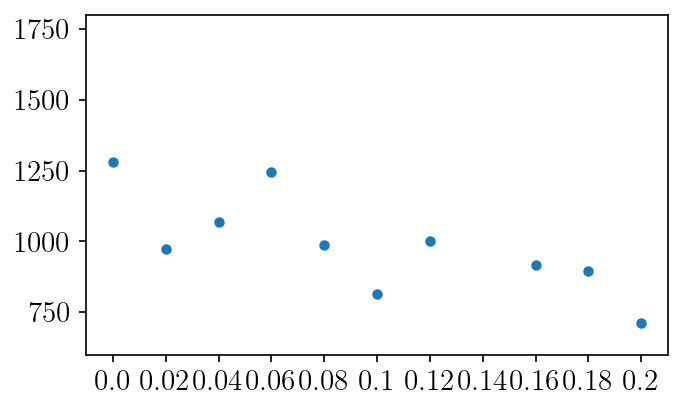

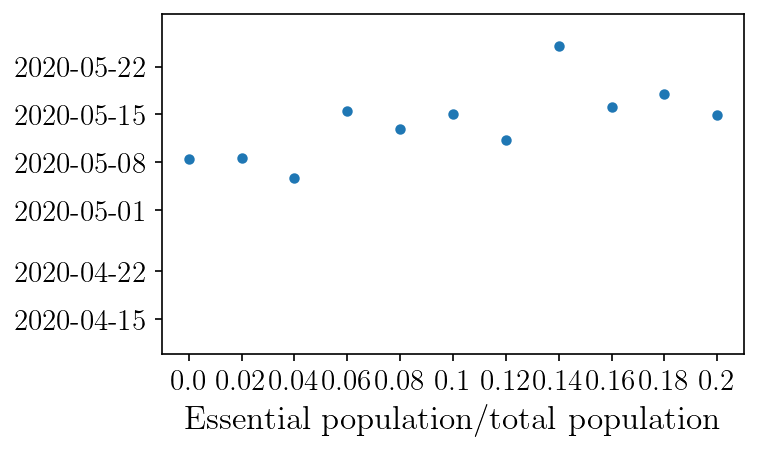

In [11]:
essential_prop = ['0.0','0.02','0.04','0.06','0.08','0.1','0.12','0.14','0.16','0.18','0.2']
max_infected = [0]*len(essential_prop)
max_infected_ind = [0]*len(essential_prop)
max_infected_time = [0]*len(essential_prop)
for i in range(len(essential_prop)):
    max_infected[i] = np.array(line_infected[i]).max()
    max_infected_ind[i] = np.where(line_infected[i]==max_infected[i])
    max_infected_time[i] = ts[max_infected_ind[i]]

FIG2 = plt.figure(figsize=(5, 3))
AX2 = FIG2.add_subplot(111)    
plt.plot(essential_prop,max_infected,'o')
# AX2.set_ylabel('Peak infection')
# AX2.set_xlabel('Essential population/total population')
AX2.set_ylim((600,1800))

FIG3 = plt.figure(figsize=(5, 3))
AX3 = FIG3.add_subplot(111)    
plt.plot(essential_prop,max_infected_time,'o')
# AX3.set_ylabel('Peak infection time')
AX3.set_xlabel('Essential population/total population')
AX3.set_ylim((ts[200],ts[470]))

-----------------------------------------------------------------
### 3.4 Supermarket essential workers (type 3)

#### 3.4.1 essential population ratio: 10%
####          * 10% random vs 100% essential

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 1.0
        
        supermarkets ID: [1, 49, 33, 68, 10] 5
        number of workers at each supermarket: [164, 167, 170, 184, 174] 859


Compare the total infections for **100% of the supermarket workers** comply versus **10% of random individuals** comply.

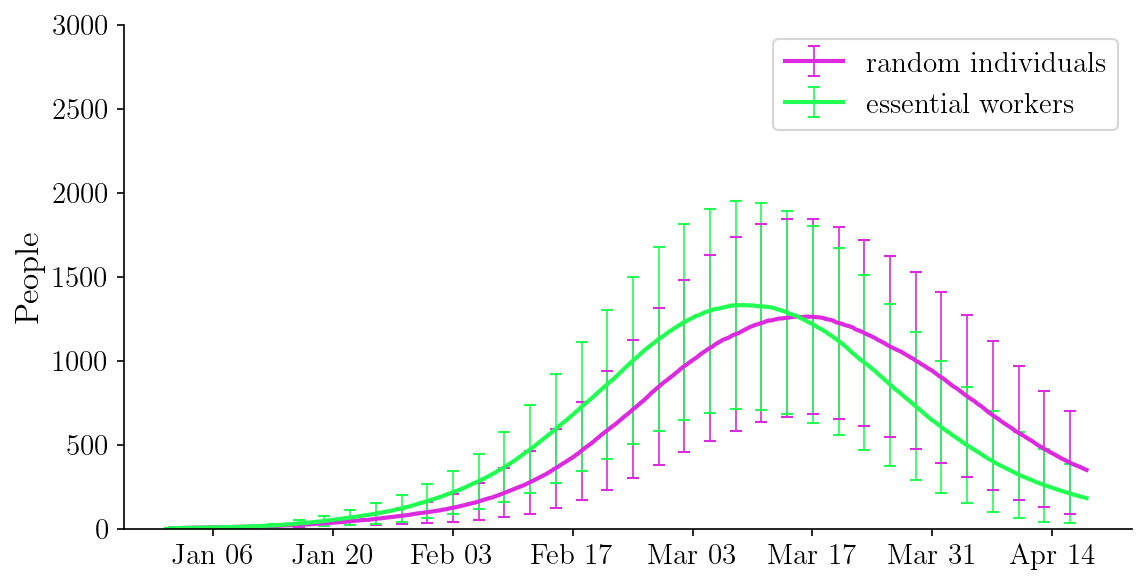

In [7]:
summaries_SD_6 = load_summary('comp[1.0]_repeats25_sf_type3_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['random individuals','essential workers']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

---------------------------
#### * 0% random vs 5% random vs 10% random

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 0, 0.5, 1.0
        
        supermarkets ID: [1, 49, 33, 68, 10] 5
        number of workers at each supermarket: [164, 167, 170, 184, 174] 859


Compare the total infections for **0% of random individuals** comply versus **5% of random individuals** versus **10% of random individuals**.

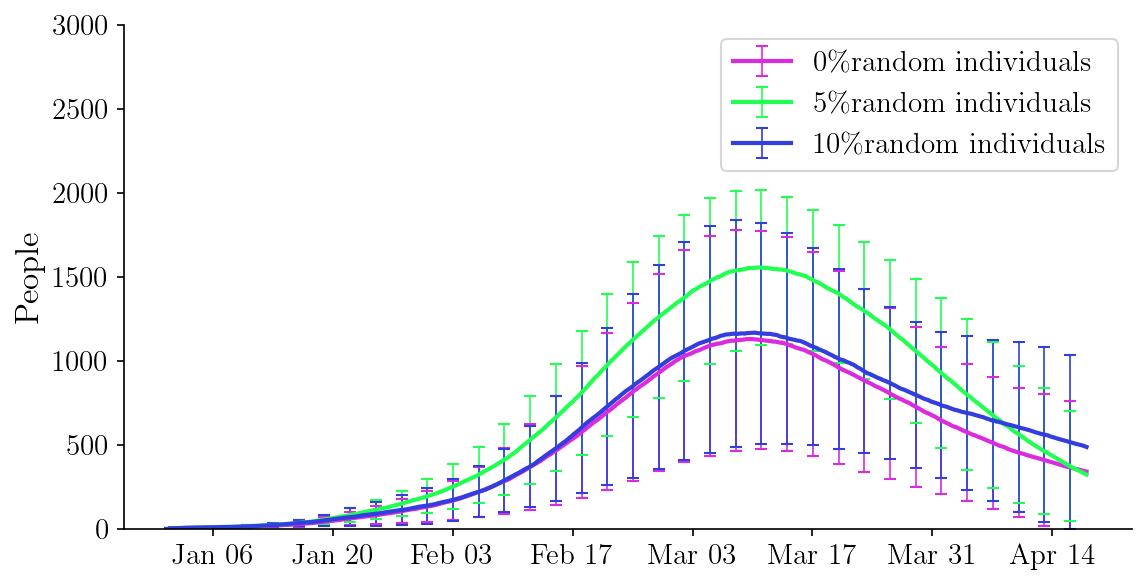

In [7]:
summaries_SD_6 = load_summary('comp[0.0,0.5,1.0]_repeats25_onlyall_sf_type3_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%random individuals','5\%random individuals','10\%random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

---------------------------
#### * 0% essential vs 50% essential vs 100% essential

Parameters:
        
        essential_to_total_ratio_list = 0.1
        essential_type = 0
        beta = household: 0, elsewhere: 0.1
        p_compliance = 0, 0.5, 1.0
        
        supermarkets ID: [1, 49, 33, 68, 10] 5
        number of workers at each supermarket: [164, 167, 170, 184, 174] 859


Compare the total infections for **0% of essential** comply versus **50% of essential** versus **100% of essential**.

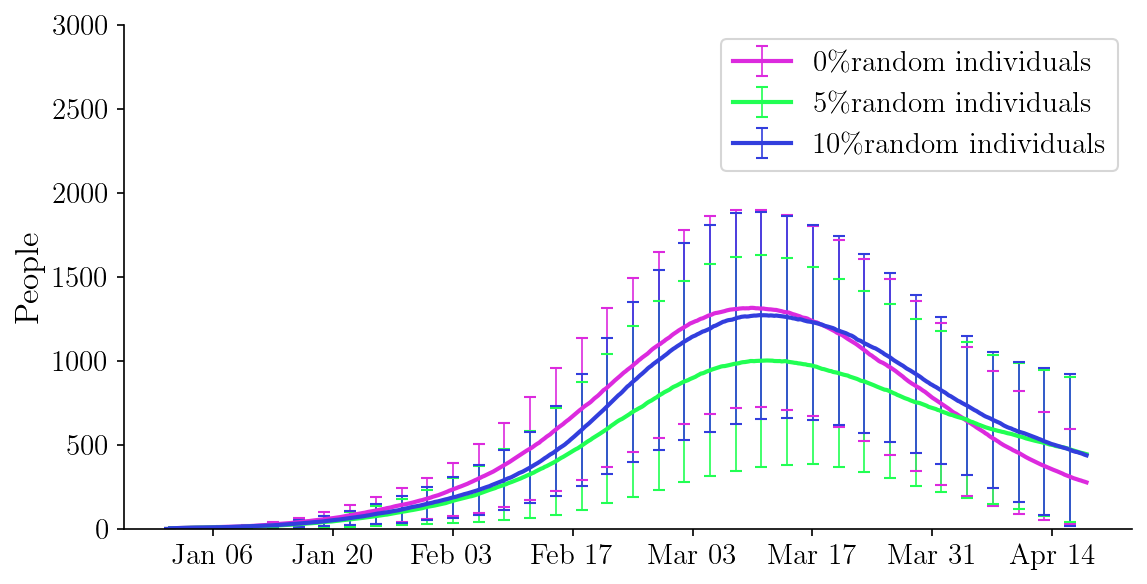

In [5]:
summaries_SD_6 = load_summary('comp[0.0,0.5,1.0]_repeats25_onlyessen_sf_type3_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%random individuals','5\%random individuals','10\%random individuals']
summaries_ = summaries_SD_6['basic']
c = 0
runstr = f'run{c}_'

plotter.compare_total_infections(
    summaries_, 
    titles=title, 
    figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
    filename=runstr + 'ST_all', 
    figsize=FIGSIZE, acc=500, 
    ymax=3000, errorevery=14)

--------------------------
----------------------------
### compare essential proportion

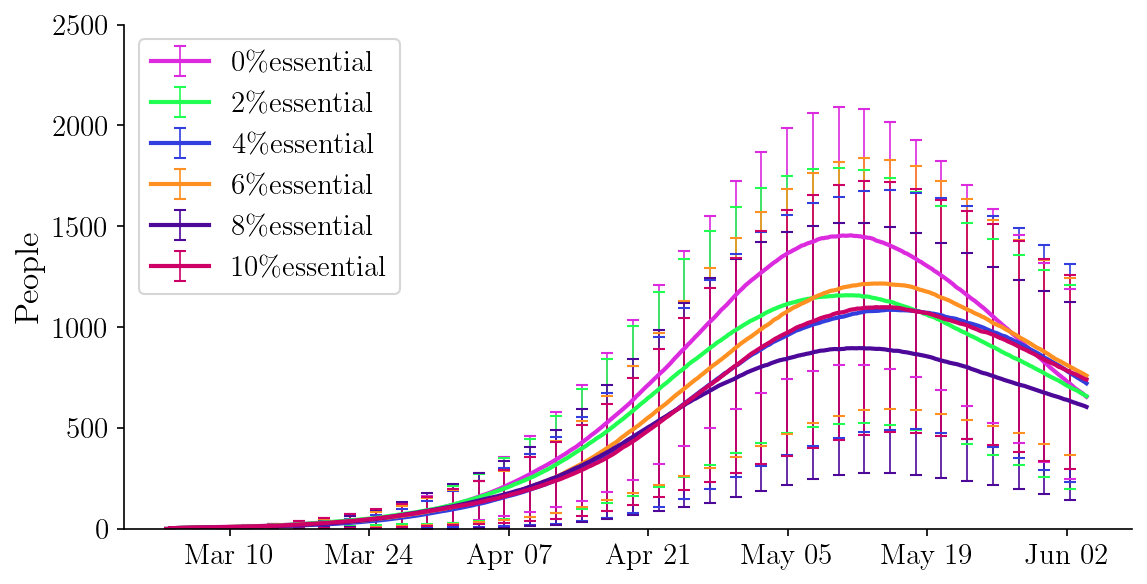

In [17]:
plt.close()
FIG1 = plt.figure(figsize=(8, 4))
AX1 = FIG1.add_subplot(111)
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.0,0.02,0.04,0.06,0.08,0.1]_sf_type3_prop0.1_ds100.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential','2\%essential','4\%essential','6\%essential','8\%essential','10\%essential']
line_infected = dict()
ts = []
essential_prop = ['0.0','0.02','0.04','0.06','0.08','0.1']
count = 0
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=2500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1


In [116]:
count = 6
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.12,0.14,0.16,0.18,0.2]_sf_type3_prop0.2_ds100.pk')
title = ['0\%essential','2\%essential','4\%essential','6\%essential','8\%essential','10\%essential','12\%essential','14\%essential','16\%essential','18\%essential','20\%essential']
essential_prop = ['0.12','0.14','0.16','0.18','0.2']
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=2500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1

<Figure size 900x600 with 0 Axes>

ValueError: x and y must have same first dimension, but have shapes (6,) and (11,)

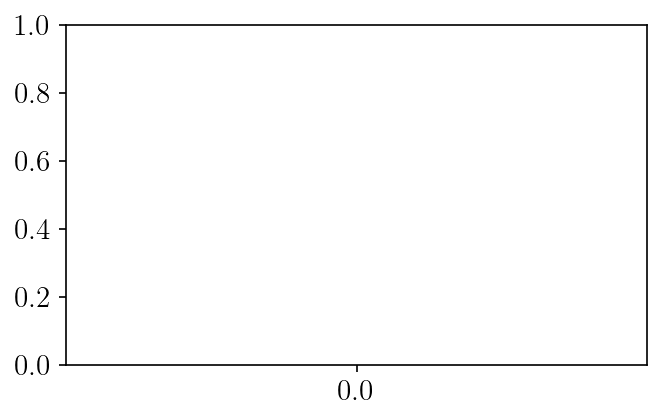

In [18]:
FIG2 = plt.figure(figsize=(5, 3))
AX2 = FIG2.add_subplot(111)    
plt.plot(essential_prop,max_infected,'o')
# AX2.set_ylabel('Peak infection')
# AX2.set_xlabel('Essential population/total population')
AX2.set_ylim((600,1800))

FIG3 = plt.figure(figsize=(5, 3))
AX3 = FIG3.add_subplot(111)    
plt.plot(essential_prop,max_infected_time,'o')
# AX3.set_ylabel('Peak infection time')
AX3.set_xlabel('Essential population/total population')
AX3.set_ylim((ts[200],ts[470]))

ConversionError: Failed to convert value(s) to axis units: array([DatetimeIndex(['2020-05-11 09:37:09.258517027'], dtype='datetime64[ns]', freq=None),
       DatetimeIndex(['2020-05-10 20:20:40.881763458'], dtype='datetime64[ns]', freq=None),
       DatetimeIndex(['2020-05-15 02:06:58.436873674'], dtype='datetime64[ns]', freq=None),
       DatetimeIndex(['2020-05-14 03:59:31.142284632'], dtype='datetime64[ns]', freq=None),
       DatetimeIndex(['2020-05-12 03:19:07.094188452'], dtype='datetime64[ns]', freq=None),
       DatetimeIndex(['2020-05-13 23:34:01.683366776'], dtype='datetime64[ns]', freq=None),
       DatetimeIndex(['2020-05-13 14:43:02.765531063'], dtype='datetime64[ns]', freq=None),
       DatetimeIndex(['2020-05-11 22:53:37.635270596'], dtype='datetime64[ns]', freq=None),
       DatetimeIndex(['2020-05-06 23:25:22.244488955'], dtype='datetime64[ns]', freq=None),
       DatetimeIndex(['2020-05-07 17:07:20.080160379', '2020-05-08 01:58:18.997996092'], dtype='datetime64[ns]', freq=None),
       DatetimeIndex(['2020-05-08 19:40:16.833667278'], dtype='datetime64[ns]', freq=None)],
      dtype=object)

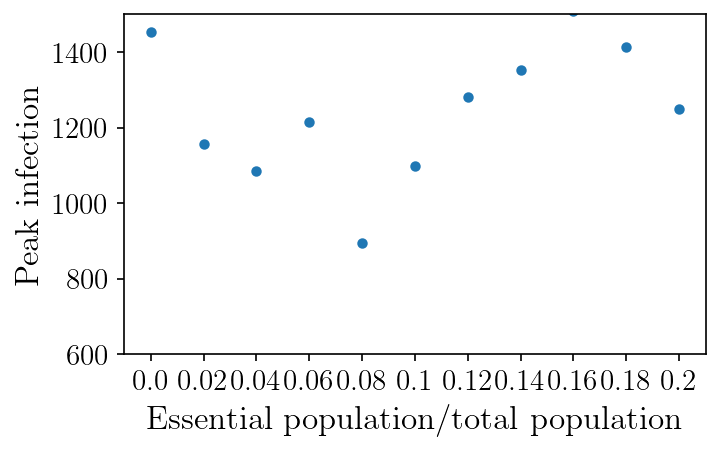

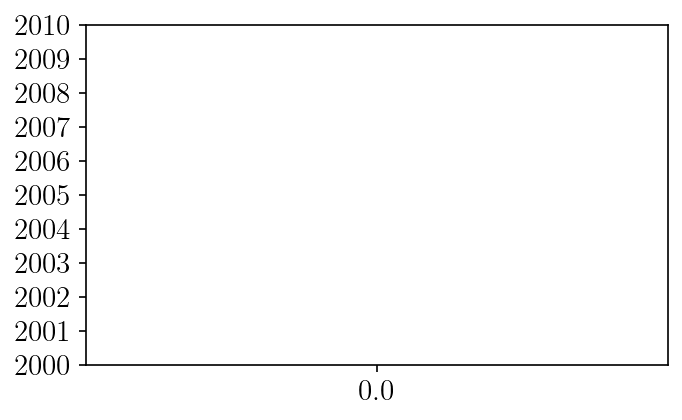

In [120]:
essential_prop = ['0.0','0.02','0.04','0.06','0.08','0.1','0.12','0.14','0.16','0.18','0.2']
max_infected = [0]*len(essential_prop)
max_infected_ind = [0]*len(essential_prop)
max_infected_time = [0]*len(essential_prop)
for i in range(len(essential_prop)):
    max_infected[i] = np.array(line_infected[i]).max()
    max_infected_ind[i] = np.where(line_infected[i]==max_infected[i])
    max_infected_time[i] = ts[max_infected_ind[i]]

FIG2 = plt.figure(figsize=(5, 3))
AX2 = FIG2.add_subplot(111)    
plt.plot(essential_prop,max_infected,'o')
AX2.set_ylabel('Peak infection')
AX2.set_xlabel('Essential population/total population')
AX2.set_ylim((600,1500))

FIG3 = plt.figure(figsize=(5, 3))
AX3 = FIG3.add_subplot(111)    
plt.plot(essential_prop,max_infected_time,'o')
AX3.set_ylabel('Peak infection time')
AX3.set_xlabel('Essential population/total population')
# AX3.set_ylim((ts[300],ts[400]))

### mall

    mall mob rate
           [5,    0,    0,   0   ], # 0-5
           [5,    0,    0,   0   ], # 5-14
           [5,    0,    3.6, 2   ], # 15-19
           [1.48, 3.52, 3.6, 3   ], # 20-24
           [0,    5,    3.6, 3   ], # 25-44
           [0,    5,    3.6, 3   ], # 45-59
           [0,    0,    3.6, 1   ], # 60-79
           [0,    0,    3.6, 0   ]] # 80+

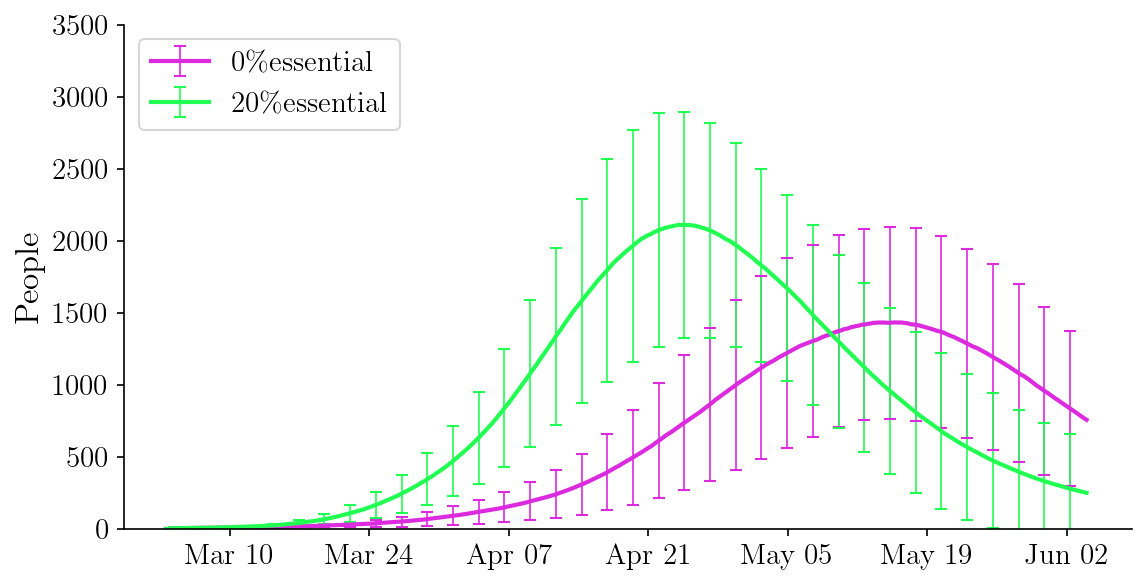

In [5]:
plt.close()
FIG1 = plt.figure(figsize=(8, 4))
AX1 = FIG1.add_subplot(111)
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.0,0.2]_sf_type3_prop0.2_ds100_dr3.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential','20\%essential']
essential_prop = ['0.0','0.2']
line_infected = dict()
count = 0
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=3500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1

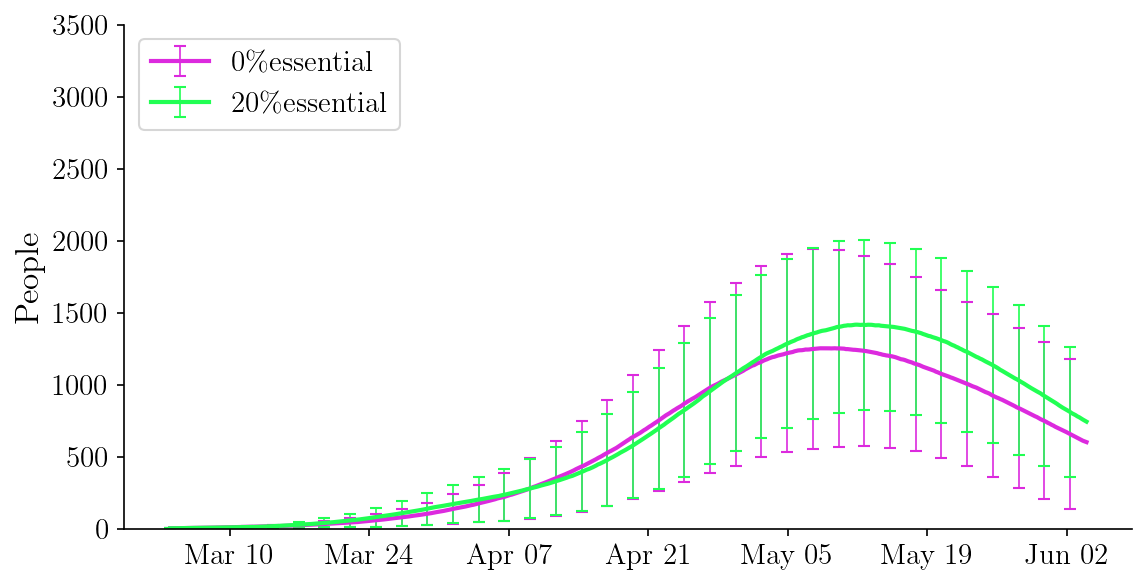

In [2]:
plt.close()
FIG1 = plt.figure(figsize=(8, 4))
AX1 = FIG1.add_subplot(111)
summaries_SD_6 = load_summary('comp[1.0]_repeats40_onlyessen_prop[0.0,0.2]_sf_type3_prop0.2_ds100_dr0.4.pk')
FIGSIZE = (8, 4)
plotter = Plotter()
title = ['0\%essential','20\%essential']
essential_prop = ['0.0','0.2']
line_infected = dict()
count = 0
for i in essential_prop:
    summaries_ = summaries_SD_6[i]
    c = 0
    runstr = f'run{c}_'
    [line_infected[count], ts] = plotter.compare_total_infections_essenprop(
        summaries_, 
        titles=title[count], 
        figtitle=r'Total Infections with Contact Tracing Case Isolation for All',
        filename=runstr + 'ST_all', 
        figsize = FIGSIZE,
        acc=500, 
        ymax=3500, errorevery=14,
        counts=count,
        ax = AX1, fig=FIG1)
    count += 1

## 4 Appendix: How work places are assigned to essential workers
-----------------------------

Once the essential type and essential population are specified, we will assign a work place for each essential worker through the following:

(e.g. essential type 3: supermarket)
1. Collect the site ID of all supermarkets in the site pool and save as work_site for future.
        e.g. work_site=[1, 49, 33, 68, 10]. 
        There are 5 supermarkets, they are site #1, #49, #33, #68, #10 respectively.
2. We assume that each work site requires the same number of workers, with some stochasticity here. At this step, we generate a probability array for all workers being assigned to each supermarket.
        e.g. prob_essential_workers_per_site = [0.19091967, 0.19441211, 0.19790454, 0.21420256, 0.20256112]
        For one specific worker, there's 19.1% chance he/she works at site #1, 19.4% chance at site #49 and so forth.
3. Then we will loop over all essential workers, and for each one, we will assign him/her a work place ID based on the probabilities at step 2. This ID will stay with this worker throughout the simulation.
        e.g. numbers of essential workers at the each of the 5 supermarkets are
             [164, 167, 170, 184, 174]
This step is already incorprated in the town_data.py, and will automatically adjust according to the essential type.**Therefore will not need to modify for different runs.**